<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_Basic-machineLearning/hw3_number_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 숫자 MNIST

## 데이터셋 다운로드
MNIST 데이터베이스(Modified National Institute of Standards and Technology database, 수정된 미국 국립표준기술연구소 데이터베이스)는 손으로 쓴 0-9까지의 숫자 이미지 모음


In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'USER' # username
os.environ['KAGGLE_KEY'] = 'KEY' # key

In [2]:
!kaggle datasets download -d oddrationale/mnist-in-csv

mnist-in-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
replace mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_test.csv          
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_train.csv         


## 패키지 로드

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## 데이터셋 로드

In [5]:
train_df=pd.read_csv('mnist_train.csv')
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df=pd.read_csv('mnist_test.csv')
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 라벨 분포
총 10개(0~9)의 라벨

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


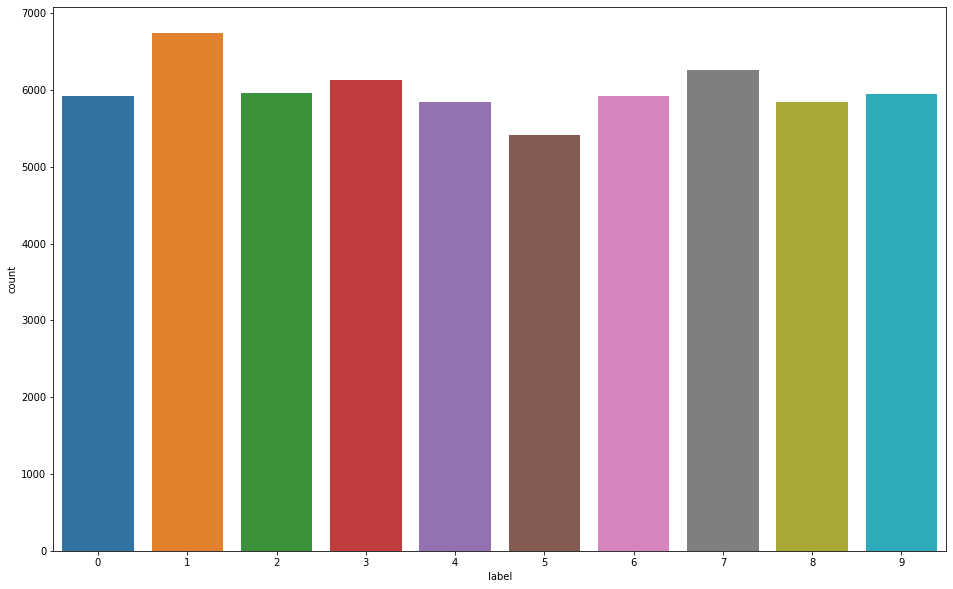

In [7]:
plt.figure(figsize=(16,10))
sns.countplot(train_df['label'])
plt.show()

## 전처리
입력과 출력나누기

In [8]:
train_df = train_df.astype(np.float32)
x_train=train_df.drop(columns=['label'],axis=1).values
y_train=train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test=test_df.drop(columns=['label'],axis=1).values
y_test=test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 1)
(10000, 784) (10000, 1)


## 데이터 미리보기

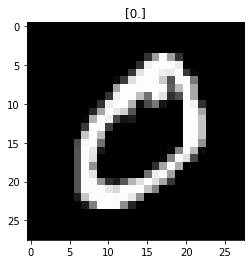

In [9]:
index=1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

## One-how encoding

In [10]:
encoder = OneHotEncoder()
y_train=encoder.fit_transform(y_train).toarray()
y_test=encoder.fit_transform(y_test).toarray()

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## 일반화
이미지 데이터의 pixel은 0~255 사이의 정수(unint8)로 되어 있다. 이것은 255로 나누어 0~1사이의 소수점 데이터(float32)로 바꾸고 일반화 시킨다

In [11]:
x_train=x_train/255
x_test=x_test/255

## 네트워크 구성

In [12]:
input=Input(shape=(784,))
hidden=Dense(1024, activation='relu')(input)
hidden=Dense(512,activation='relu')(hidden)
hidden=Dense(256,activation='relu')(hidden)
output=Dense(10, activation='softmax')(hidden)

model=Model(inputs=input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## 학습

In [13]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test), #검증 데이터를 넣어주면 한 epoch이 끝날떄마다 자동으로 검증
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1946 - acc: 0.9409 - val_loss: 0.1010 - val_acc: 0.9697
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0908 - acc: 0.9732 - val_loss: 0.0848 - val_acc: 0.9752
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0624 - acc: 0.9811 - val_loss: 0.0843 - val_acc: 0.9777
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0519 - acc: 0.9839 - val_loss: 0.0767 - val_acc: 0.9783
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0413 - acc: 0.9876 - val_loss: 0.0795 - val_acc: 0.9794
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0741 - val_acc: 0.9823
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - acc: 0.9909 - val_loss: 0.0804 - val_acc: 0.9805
Epoch 8/20
1875/1875 [==============================] - 9s 5m

## 학습 결과 그래프

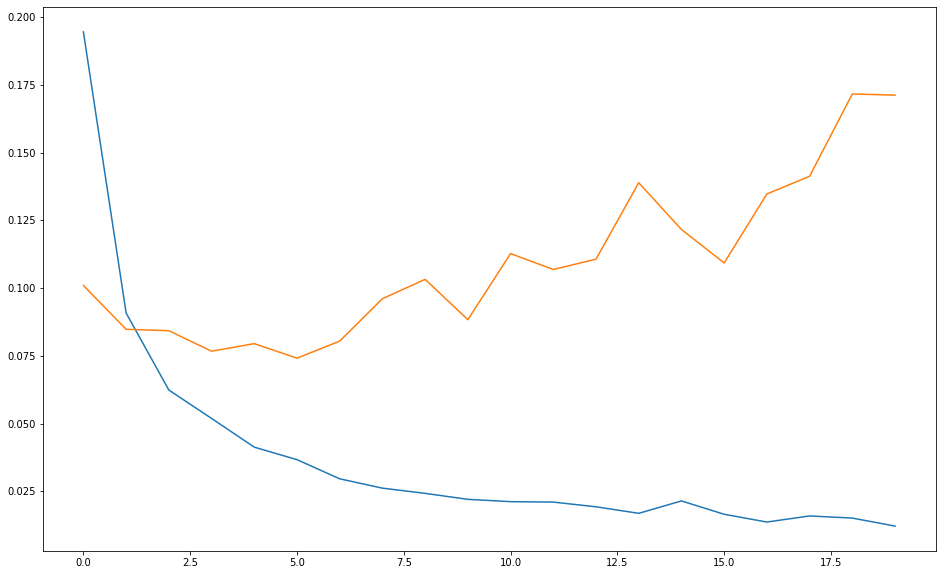

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

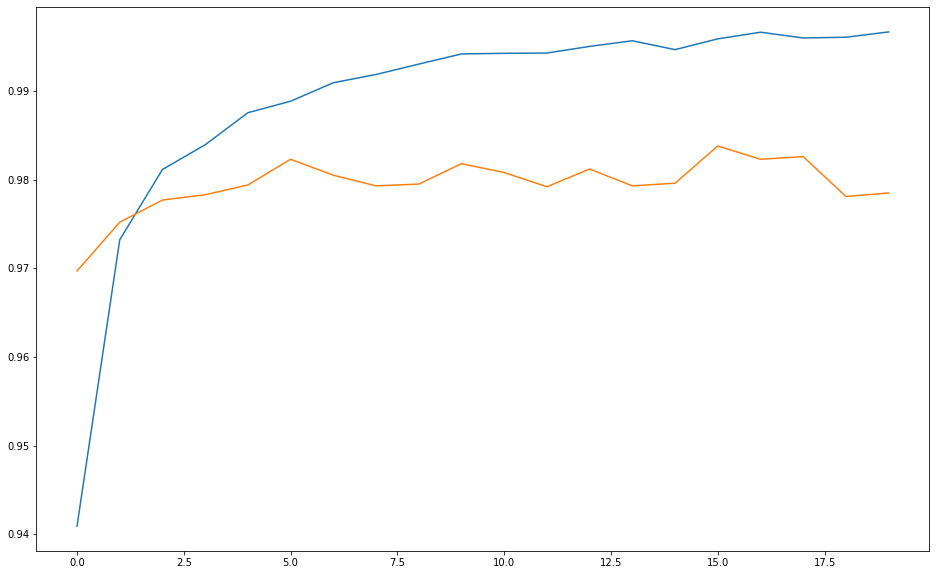

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])